In [ ]:
1. Nasiha Assakinah		  (23.11.5395)
2. Arya Nurhikam			  (23.11.5420)
3. Wahyu Setyo Dwicahyo	(23.11.5434)
4. Y Putra Perdana      (23.11.5436)

SyntaxError: invalid syntax (ipython-input-5-331996315.py, line 1)

In [ ]:
# Import semua library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [ ]:
file_path = 'healthcare_dataseet.csv'

try:
    print("Mencoba memuat dan membersihkan data dengan metode otomatis...")
    df = pd.read_csv(file_path, delimiter=';', header=0)

    keyword_mapping = {
        'Age': 'Age',
        'Gender': 'Gender',
        'Height': 'Height_cm',
        'Weight': 'Weight_kg',
        'BMI': 'BMI'
    }

    ditemukan_dan_nama_baru = {}
    for keyword, nama_baru in keyword_mapping.items():
        for nama_asli_kolom in df.columns:
            if keyword.lower() in str(nama_asli_kolom).lower():
                ditemukan_dan_nama_baru[nama_asli_kolom] = nama_baru
                break

    if len(ditemukan_dan_nama_baru) < len(keyword_mapping):
        raise ValueError("Beberapa kolom penting (seperti Age, Height, dll) tidak dapat ditemukan secara otomatis.")

    df_cleaned = df[list(ditemukan_dan_nama_baru.keys())].copy()

    df_cleaned.rename(columns=ditemukan_dan_nama_baru, inplace=True)

    for col in ['Age', 'Height_cm', 'Weight_kg', 'BMI']:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col].astype(str).str.replace(',', '.'), errors='coerce')
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

    df_cleaned['Age'] = df_cleaned['Age'].astype(int)

    df_cleaned.to_csv('healthcare_cleaned.csv', index=False)

    print("\n✅ DATA BERHASIL DIBERSIHKAN DENGAN METODE OTOMATIS!")
    print("\nNama Kolom Final:", df_cleaned.columns.tolist())
    print("\n5 Baris Pertama Data Bersih:\n", df_cleaned.head())

except Exception as e:
    print(f"\n❌ TERJADI KESALAHAN: {e}")

Mencoba memuat dan membersihkan data dengan metode otomatis...

✅ DATA BERHASIL DIBERSIHKAN DENGAN METODE OTOMATIS!

Nama Kolom Final: ['Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI']

5 Baris Pertama Data Bersih:
    Age  Gender   Height_cm   Weight_kg    BMI
0   32  Female  185.548351  110.646301  32.14
1   21    Male  164.240726   41.684285  15.45
2   53  Female  177.607370   91.046022  28.86
3   49    Male  184.892880   58.869005  17.22
4   46    Male  164.832291   96.739075  35.61


In [ ]:
df = pd.read_csv('healthcare_cleaned.csv')
bmi_above_33 = df[df['BMI'] > 33]

print(bmi_above_33)

      Age  Gender   Height_cm   Weight_kg    BMI
4      46    Male  164.832291   96.739075  35.61
7      87  Female  179.649772  112.465763  34.85
8      29  Female  175.580071  148.951650  48.32
9      72    Male  150.007941  110.256338  49.00
10     22  Female  186.457902  122.393199  35.20
...   ...     ...         ...         ...    ...
9995   46  Female  155.964605   85.936472  35.33
9996   31  Female  155.254632  122.818023  50.95
9997   54    Male  190.127514  133.986799  37.07
9998   63  Female  167.654901  145.958651  51.93
9999   27  Female  188.015173  128.504661  36.35

[4823 rows x 5 columns]


Ditemukan 5668 pasien dengan BMI di atas 30.

Persentase berdasarkan gender untuk kelompok ini:
Gender
Male      50.84686
Female    49.15314
Name: count, dtype: float64


/tmp/ipython-input-23-1783170100.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_percentages.index, y=gender_percentages.values, palette='viridis')



✅ Bar chart persentase berhasil dibuat.


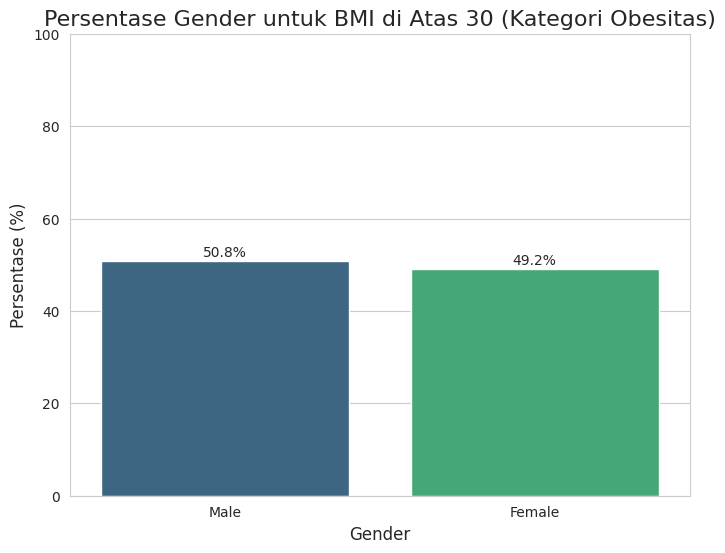

In [ ]:
# 1. Filter dataset untuk mengambil data dengan BMI > 30
df_obese = df_cleaned[df_cleaned['BMI'] > 30].copy()

print(f"Ditemukan {len(df_obese)} pasien dengan BMI di atas 30.")

# 2. Hitung jumlah berdasarkan gender, lalu ubah menjadi persentase
gender_counts = df_obese['Gender'].value_counts()
gender_percentages = (gender_counts / len(df_obese)) * 100

print("\nPersentase berdasarkan gender untuk kelompok ini:")
print(gender_percentages)

# 3. Buat bar chart dari data persentase
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_percentages.index, y=gender_percentages.values, palette='viridis')
plt.title('Persentase Gender untuk BMI di Atas 30 (Kategori Obesitas)', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.ylim(0, 100)

# 4. Tambahkan label persentase di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.1f}%', ha="center")

# Simpan dan tampilkan grafik
plt.savefig('bmi_obese_percentage_barchart.png')
print("\n✅ Bar chart persentase berhasil dibuat.")
plt.show()

✅ Pie chart dibuat.


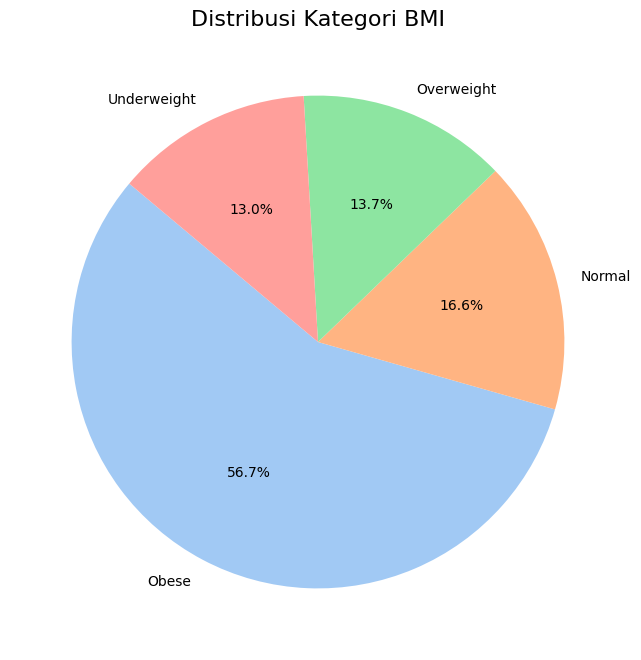

In [ ]:
bins = [0, 18.5, 25, 30, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df_cleaned['BMI_Category'] = pd.cut(df_cleaned['BMI'], bins=bins, labels=labels, right=False)

bmi_counts = df_cleaned['BMI_Category'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribusi Kategori BMI', fontsize=16)
plt.savefig('bmi_category_piechart.png')
print("✅ Pie chart dibuat.")
plt.show()

✅ Line chart berdasarkan kelompok usia berhasil dibuat.


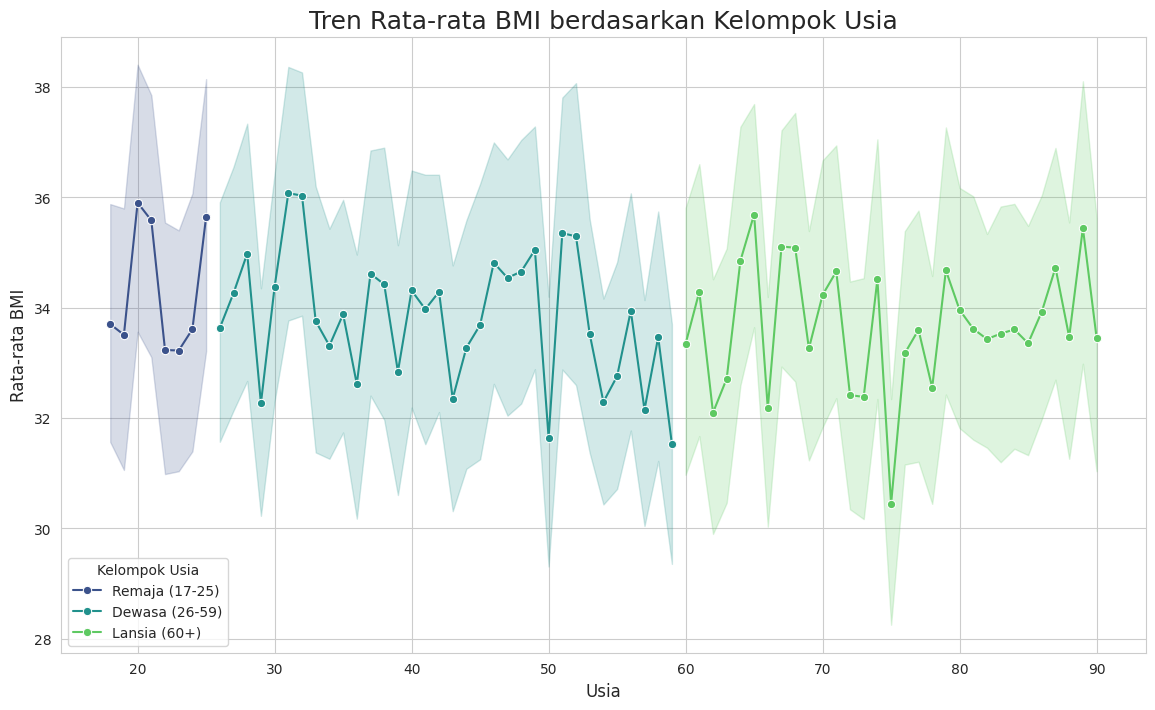

In [ ]:
try:
    # 1. Buat kolom baru 'Age_Group' untuk mengkategorikan usia
    # Bins (rentang): 17-25, 26-59, 60 ke atas
    bins = [16, 25, 59, float('inf')]
    labels = ['Remaja (17-25)', 'Dewasa (26-59)', 'Lansia (60+)']

    # Menggunakan pd.cut untuk membuat kategori secara efisien
    df_cleaned['Age_Group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=True)

    # 2. Buat plot
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # 3. Gunakan 'hue' untuk membuat garis terpisah berdasarkan 'Age_Group'
    sns.lineplot(
        data=df_cleaned,
        x='Age',
        y='BMI',
        hue='Age_Group',
        marker='o',
        palette='viridis'
    )

    # 4. Atur judul dan label
    plt.title('Tren Rata-rata BMI berdasarkan Kelompok Usia', fontsize=18)
    plt.xlabel('Usia', fontsize=12)
    plt.ylabel('Rata-rata BMI', fontsize=12)
    plt.legend(title='Kelompok Usia')
    plt.grid(True)

    # Simpan dan tampilkan grafik
    plt.savefig('bmi_age_groups_linechart.png')
    print("✅ Line chart berdasarkan kelompok usia berhasil dibuat.")
    plt.show()

except NameError:
    print("❌ KESALAHAN: DataFrame 'df_cleaned' tidak ditemukan. Jalankan sel pembersihan data terlebih dahulu.")
except Exception as e:
    print(f"❌ Terjadi kesalahan: {e}")

Heatmap berhasil dibuat.


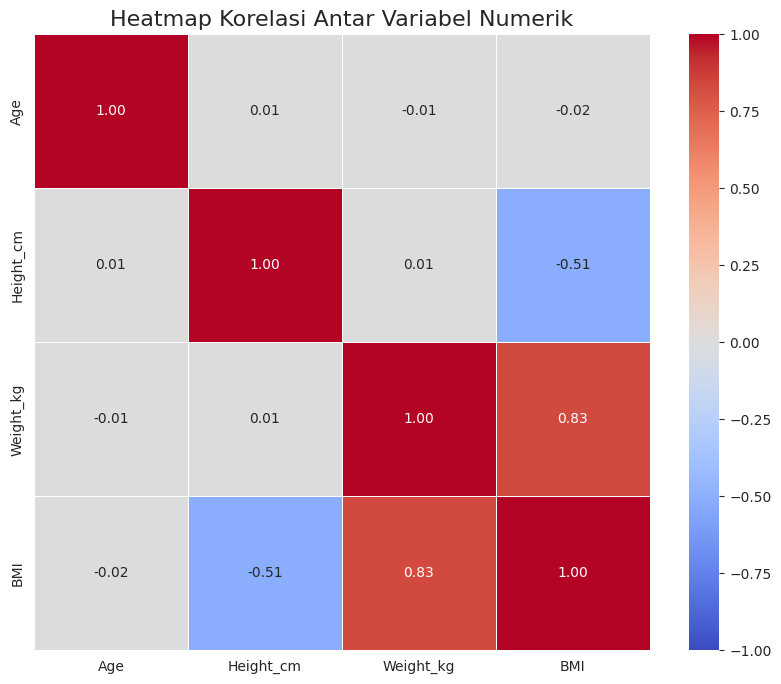

In [ ]:
try:
    numerical_cols = ['Age', 'Height_cm', 'Weight_kg', 'BMI']
    correlation_matrix = df_cleaned[numerical_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,          # Menampilkan angka korelasi
        cmap='coolwarm',     # Palet warna: biru (negatif), merah (positif)
        fmt=".2f",           # Format angka menjadi 2 desimal
        linewidths=.5,
        square=True,
        vmin=-1, vmax=1
    )

    plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=16)

    # Simpan dan tampilkan grafik
    plt.savefig('correlation_heatmap_improved.png')
    print("Heatmap berhasil dibuat.")
    plt.show()

except NameError:
    print("❌ KESALAHAN: DataFrame 'df_cleaned' tidak ditemukan. Jalankan sel pembersihan data terlebih dahulu.")
except Exception as e:
    print(f"❌ Terjadi kesalahan: {e}")

--- Hasil Evaluasi Model ---
Mean Absolute Error (MAE): 1.93
Mean Squared Error (MSE): 6.21
R-squared (R2 Score): 0.9655

 Plot evaluasi


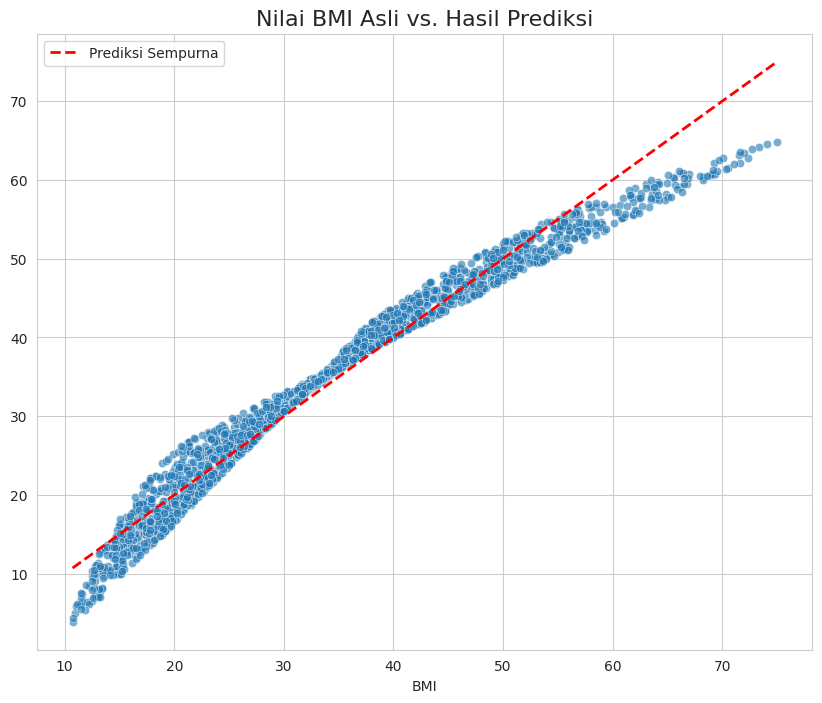

In [ ]:
features = ['Height_cm', 'Weight_kg', 'Age']
target = 'BMI'
X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'bmi_prediction_model.pkl')
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Hasil Evaluasi Model ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.4f}")

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Prediksi Sempurna')
plt.title('Nilai BMI Asli vs. Hasil Prediksi', fontsize=16)
plt.legend()
plt.grid(True)
plt.savefig('prediction_vs_actual.png')
print("\n Plot evaluasi")
plt.show()